## MACHINE LEARNING

<font color = "DarkSlateGray"><br>
Dünyada resim, müzik... gibi bir çok veri bulunmaktadır. İnsanlar bu verileri matematiksel ve istatistiksel olarak anlamlandırabilirler. Fakat insanların çok uzun süreçlerde yapabileceği işlemleri, makineler çok daha kısa sürede yapabilmektedir. Makineler verilerden bilgiler, yorumlar çıkararak veriyi anlamlandırmamızı sağlamaktadır.
Bu makinelerin kullandığı algoritmalara, maching learning algoritmaları denir. 

Bu çalışmada excel'den oluşturarak uzantısı csv 'ye dönüştüdüğümüz veri setini kullanacağız.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("linear_regression_dataset.csv", sep=";")

In [3]:
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


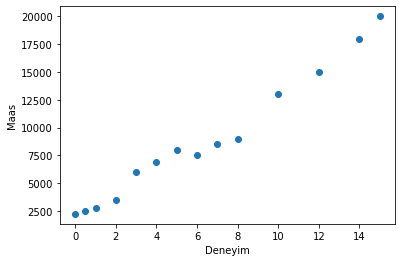

In [4]:
plt.scatter(df.deneyim,df.maas)
plt.xlabel("Deneyim")
plt.ylabel("Maas")
plt.show()

Yukarıda data frame'i görselleştirdim. x ekseni deneyimleri ifade etmekte, y eksenide maaşları ifade etmekte. Çıktıda görüldüğü üzere maaş, deneyim doğrultusunda artıyor.

Mesela deneyimi 9 olan birinin maaşının ne kadar olacağını görsele bakarak yaklaşık olarak anlayabiliyoruz. Aslında zihnimiz bir çizgi hayal ediyor ve bu çizgiye göre değerin ne olacağını kestirebiliyoruz. Bunu modele çevirebilmemiz için mavi noktalara bir line fit etmeliyiz, uydurmalıyız. Fit eetiğimiz line'ı istediğimiz değeri tahmin etmek için kullanırız. Bu metodun ismine "line fit" veya "linear regression" denir.

<font color ="OrangeRed"><br>
Çizilen line'ın matematikteki karşılığı: y = b0 + b1*x

İfadeyi açıklayalım.
    
    y: y eksenidir. Burada y, Maaş değerleridir.
    
    x: x eksenidir. Burada y, Deneyim değerleridir.
    
    b0: Bias değeridir.
    
    b1: Line'ın eğimidir. 
    
b0, line'ın y eksenini kestiği noktadır. 
    
Bu formül burada şu hale geliyor: Maaş = b0 + b1*Deneyim

<img src="linearRegression.png" style="width:900px;height:600px"/>

Yukarıdaki resme bakınız.

Burada kırmızı çizgi modeli ifade ediyor. y_head ifadesi kırmızı çizginin x ekseni için gösterdiği y değeridir. Yani y_head, tahmin edilen değerdir. Mavi noktalar ise gerçek değerler yani y'dir. y-y_head ifadesinden elde edilen sonuca residual denir. Mavi noktalar ile model arasındaki çizgiler tahminin, gerçek değerden ne kadar farklı olduğunu gösterir. Yani siyah çizgiler kaybı, hatayı ifade eder. Siyah çizgiler, residual değeridir. 

'+' kısımların anlamı, y'den y_head çıkarılında pozitif bir değer elde edildiğidir. '-' kısımlarda ise y'den y_head değeri çıkarıldığında negatif bir değer elde edilir.

Amacımız hatayı düşürmektir. Eğer elde edilen değerleri direk toplarsak bunlar birbirlerini sıfırlarlar. Hata=0 yani düşük ama bu hiç mantıklı değil çünkü hatalar var. Hataların olmasına rağmen 0 bulmamız mantıklı değil. Bu nedenle - 'leri + 'ya çevirmemiz gerekir.

'-' 'leri '+' 'ya şu şekilde çevirebiliriz: (residual^2) şeklinde residual değerlerinin karesini alırız. Böylelikle - ve + 'dan dolayı error'ları kaybetmemiş oluyorum. Sonrada elde edilen tüm residual'ları toplamalıyız. sum(residual^2) işlemi yapmalıyız çünkü ne kadar çok hata var, line'ı ne kadar doğru bir şekilde fit edebilmişiz ya da edememişiz bunu bilmeliyiz. Toplam sonucundada error değerini elde ederiz.

sum(residual^2)/sample_sayisi şeklinde de scale yapmış oluyoruz. Başka farklı sayıdaki veri setleriyle karşılaştırırken sample sayısına bölmek önemli oluyor. sum(residual^2)/sample_sayisi ifadesi "MSE" dir.

MSE = Mean Squared Error 'dur. Bir line'ı fit etmek için kullanılan yöntem MSE'dir.

<img src="mse.png" style="width:400px;height:200px"/>

Yukarıda MSE formülünü görüyorsunuz. Açıklayalım.

n: sample sayısıdır. Yukarıda 14 tane nokta olduğundan burada n=14 'tür.

yi : Mavi noktalardır.

~
yi: fit ettiğimiz line'ın üzerindeki noktalardır. 


   ~
yi-yi ifadesi yukarıda bahsettiğim residual'dır. Bu ifadenin karesinin alınma sebebi, - değerleri kaybetmemektir. Çünkü hatalar söz konusu. Bu hataların karesini almayıp pozitif değerlerle toplarsak - ler + ları götüreceğinden sonuç 0 olur fakat burada hatalar var, 0 olursa hiç hata yokmuş gibi olur ve bu yüzden 0 olmamalı. Dolayısıyla karesini almamız gerekmekte.

Her bir nokta için residual değerini bulup tüm değerleri toplayarak squared error'u bulmuş oluyoruz. Sonrada elde edilen değeri sample sayısına bölerek mean square error 'u elde etmiş oluyoruz.

MSE, line fit edebilmek için kullanılan bir yöntemdir.

MSE değerini düşük bulmak amacımızdır. MSE değeri düşük olduğunda noktaların ortasından geçen en uygun line'ı elde etmiş oluyoruz. Yani noktalara en uygun line'ı fit etmiş, uydurmuş oluyoruz.

y = b0 + b1*x ifadesinde en uygun b0 ve b1 değerlerini bulmalıyız. Bu değerler MSE değerini minimum yapacak şekilde olmalıdır.

<br><br>
sklearn kütüphanesini kullanacağız. Bu kütüphane içerisinde machine learning algoritmaları bulunmakta.

Şimdi linear regression uygulayalım.

In [5]:
x = df.deneyim.values.reshape(-1,1)

y = df.maas.values.reshape(-1,1)

x = df.deneyim.values dediğimizde ve x'in shape'sine baktığımızda sonuç (14,) dür. Burada , den sonraki boşluğu sklearn anlamaz. Dolayısıyla df.deneyim.values.reshape(-1,1) şeklinde (14,1) olmasını sağladım.

In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(x,y)

b0 = linear_reg.predict([[0]])

print("b0: ",b0)

b0:  [[1663.89519747]]


linear_reg.predict[[0]] ifadesi ile x=0 iken değerin ne olacağının tahmin edilmesi sağlanmıştır. x=0 iken formüle uygularsak 

y = b0 + b1*0 

y = b0 

olacaktır. Dolayısıyla b0 = linear_reg.predict[[0]] satırı ile line'ın x eksenini kestiği noktayı elde etmiş olucaz.

Çıktıda gördüğümüz üzere line'ın y eksenini kestiği nokta 1663 'dür.

<br><br>
Ayrıca b0 değerini intercept_ metodu ile de bulabiliriz:

In [7]:
b0_ = linear_reg.intercept_
print("b0_: ",b0_)  # y eksenini kestiği nokta intercept 

b0_:  [1663.89519747]


Görüldüğü üzere x=0 durumunda b0 çıktısı ile intercept_ metodu sonucundaki çıktı değerleri aynıdır.

<br><br>
b1 değerini bulabilmemiz için de coef_ metodu vardır:

In [8]:
b1 = linear_reg.coef_
print("b1: ",b1)

b1:  [[1138.34819698]]


b1 değeri eğime eşittir.

b0 ve b1 değerlerini yerine koyalım:

<font color="LimeGreen"><br>
maas = 1663 + 1138*deneyim
<font color="LimeGreen"><br>
Bu ifade linear regression modelinin denklemidir. 

Bu denklem ile istediğimiz değerin karşılığını predict edebiliriz.

In [9]:
linear_reg.predict([[11]])

array([[14185.72536421]])

x=11 yani deneyim değeri 11 olan kişinin maaş değerini modelimizin denklemi ile tahmin edebiliriz.

Yukarıdaki kod bloğunda aslında şu işlem yapılmıştır: maas = 1663 + 1138*11 = 14185

Şimdi de fit ettiğimiz line'ı görselleştirelim.

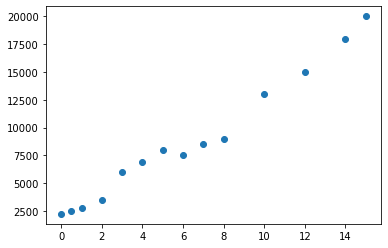

In [10]:
#visualize line
array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.scatter(x,y)
plt.show()

In [11]:
array.shape

(16,)

(16,) ifadesini sklearn anlayamaz. Sklearn (16,1) ifadesini görmek istiyor. Dolayısıyla reshape metodunu kullanarak bunu yapabiliriz.

In [12]:
array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)  #deneyim değerleridir.

Şimdide array'deki değerleri predict edelim.

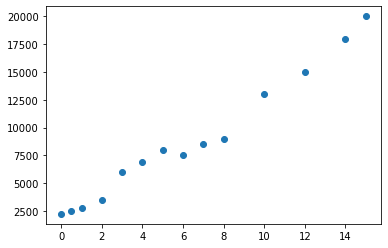

In [15]:
plt.scatter(x,y)
plt.show()

In [17]:
y_head = linear_reg.predict(array) #maas değerleridir.

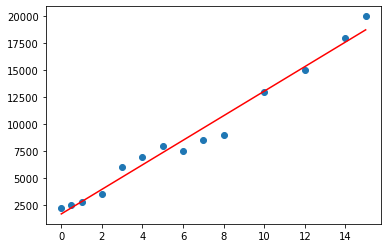

In [21]:
plt.plot(array, y_head, color="red")
plt.scatter(x,y)
plt.show()